<font color=blue><h1>Computation</h1>

<font color=blue><h3>What is a Computational Problem?</h3>

To start, a Computational Problem in Computer Science is a problem that can be solved by using an algorithm, more specifically, the problem can be viewed as a set of instances with possibly an empty set of solutions for every instance. The objective of Computational Problem's is to determine the amount of resources or computational complexity that is required to solve a problem and may even explain why it cannot be solved, at least for now with classic computers.
    
A common problem that is yet to be solved is matrix multiplication. The reason this is such an important problem is that matrix multiplication is used in many aspects of ourlives, even in ways we do not see. Examples of this is generating graphics in video games and recognising speech commands and with Video Games being the biggest industry for entertainment and most devices connected to the internet have some version of a voice assistant is proof of the importance of matrix multiplication.
    
So what exactly is the problem? It is how quickly can a computer solve the operation of multiplying a matrix. It is one of the simpilest forms of mathematics, taught at second level education in Ireland but in the digital world is where it gets more complex and to make matters that bit worse, the problem isn't that well understood and so, currently there isn't a known better way of solving the problem. Here is an example of a matrix.

In [1]:
#This is a package we would have seen in Topic Two
import numpy as np
#Creates Array A to use as a Matrix as Python doesn't
#have a built in type for Matricies
A = np.array([[1, 2, 3], [3, 4, 5]])
#Print out the contents of Array A
print(A)

[[1 2 3]
 [3 4 5]]


<font color=blue><h3>The Algorithms for multiplying Matricies</h3>

To start, by applying the definition of multiplying a matrix gives an algorithm that takes time on the order of n^3 field operations to multiply two n x n matricies over that field  (Θ(n3) in big O notation). First published in the end of the 1960's, 'Strassen's algorithm' (named after Volker Strassen) was introduced. This algorithm can solve Matrix multiplications faster than the standard matrix multiplication algorithm for larger matricies with a better asymptotic complexity (this is an indicator of performance and shows an algorithms limitations) but is slower by todays standards even though not many breakthroughs have happened. Until 2022, the next best algorithm for solving matricies was the 'matrix multiplication algorithm', designed by Josh Alman and Virginia Vassilevska Williams. The reason for this was the algorithms asymptotic complexity that runs in  O(n2.3728596) time but is considered a 'galactic algorithm' but we will get into that more later in the notebook.

In 2022, DeepMind an Artificial Intelligence subsidiary of a British company name Alphabet Inc. introduced AlphaTensor. Why this is worth talking about is because this is the biggest breakthrough in multiplying two matrices in about fifty years. How DeepMind went about making this breakthrough was by turning the problem into a single-player 3-D board game with the name 'TensorGame'. The board represents the multiplication problem itself and each move that the player makes in the game is the next step in solving the problem. Each move results in the algorithm. AlphaTensor learns what is the best step to make when multiplying matrices by using machine learning. 

In a quote from DeepMind's website, they said “AlphaTensor discovered algorithms that are more efficient than state-of-the-art for many matrix sizes. Our AI-designed algorithms outperform human-designed ones, which is a major step forward in the field of algorithmic discovery”. 

A notable acomplishment the AI has made is that it figured out how to multiply two 4 x 4 matrices with 47 multiplications rather than 64 by multiplying each row by each column seen in the matrix multiplication algorithm. Even futher, it takes two less steps tham Strassen's algorithm (49 steps) to complete which is why it is possibly the biggest breakthrough in around fifty years. 

<font color=blue><h3>A deeper look at Strassen's algorithm</h3>

Strassen's algorithm is seen as not optimal for practical applications for reasons such as for sparse matricies, better methods are available or submatricies in recursion take more space. Strassen's algorithm can be broken down into four steps with a python implementation of the algorithm. 
<ol>
    <li>First you must divide matrix A and Matrix B into four sub-matricies of size N/2 x N/2.</li>
    <li>Then multiply the seven matrices recursively.</li>
    <li>Compute submatricies of C.</li>
    <li>Finally, combine the submatricies into matrix C.</li>
</ol>

In [2]:
import numpy as np


def strassen_algorithm(x, y):
    if x.size == 1 or y.size == 1:
        return x * y

    n = x.shape[0]

    if n % 2 == 1:
        x = np.pad(x, (0, 1), mode='constant')
        y = np.pad(y, (0, 1), mode='constant')

    m = int(np.ceil(n / 2))
    a = x[: m, : m]
    b = x[: m, m:]
    c = x[m:, : m]
    d = x[m:, m:]
    e = y[: m, : m]
    f = y[: m, m:]
    g = y[m:, : m]
    h = y[m:, m:]
    p1 = strassen_algorithm(a, f - h)
    p2 = strassen_algorithm(a + b, h)
    p3 = strassen_algorithm(c + d, e)
    p4 = strassen_algorithm(d, g - e)
    p5 = strassen_algorithm(a + d, e + h)
    p6 = strassen_algorithm(b - d, g + h)
    p7 = strassen_algorithm(a - c, e + f)
    result = np.zeros((2 * m, 2 * m), dtype=np.int32)
    result[: m, : m] = p5 + p4 - p2 + p6
    result[: m, m:] = p1 + p2
    result[m:, : m] = p3 + p4
    result[m:, m:] = p1 + p5 - p3 - p7

    return result[: n, : n]

if __name__ == "__main__":

    x = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    y = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, -1]])
    print('Matrix multiplication result: ')
    print(strassen_algorithm(x, y))

Matrix multiplication result: 
[[-1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]


<b>And here is the look at the time complexity for Strassen's algorithm</b>
<ul>
    <li>Worst case time complexity: Θ(n^2.8074)</li>
    <li>Best case time complexity: Θ(1)</li>
    <li>Space complexity: Θ(logn)</li>
</ul>

<font color=blue><h3>A deeper look at Matrix Multiplication Algorithm</h3>

There isn't much to discuss about the Matrix Multiplication Algorithm as its pretty much the algorithm taught to students in maths class but there is a way to implement in Python as seen below, although a condition does have to be met, and this is if two matricies named A and B, and their dimensions are (M x N) and (P x Q) respectively, then the result of matrix C is (M x Q). Interestingly enough, in Python there are two ways to multiply two matricies. The first is using nested loops and other is using nested lists. We have included examples for both down below. Also felt it was worth mentioning that we have kept the valued for all of the 3x3 matricies to more so highlight the functionality rather than the results.

One thing we do want to mention about this algorithm. In the paragraph above, it was mentioned that it is considered a galactic algorithm. What this means is that the algorithm does outperform any other algorithm for problems that are considered large, but the problem is considered so large, it's never actually used for any data sets.

<b>Matrix Multiplication Algorithm in Python using nested loop's</b>

In [3]:
# Program to multiply two matrices using nested loops

# 3x3 matrix
X = [[4,7,16],
    [7,2,1],
    [11 ,10,9]]
# 3x3 matrix
Y = [[5,3,10],
    [6,12,5],
    [4,5,10]]
# result is 3x3
result = [[0,0,0],
         [0,0,0],
         [0,0,0]]

# iterate through rows of X
for i in range(len(X)):
   # iterate through columns of Y
   for j in range(len(Y[0])):
       # iterate through rows of Y
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]

for r in result:
   print(r)

[126, 176, 235]
[51, 50, 90]
[151, 198, 250]


In [4]:
# Program to multiply two matrices using list comprehension

# 3x3 matrix
X = [[4,7,16],
    [7,2,1],
    [11 ,10,9]]

# 3x3 matrix
Y = [[5,3,10],
    [6,12,5],
    [4,5,10]]

# result is 3x3
result = [[sum(a*b for a,b in zip(X_row,Y_col)) for Y_col in zip(*Y)] for X_row in X]

for r in result:
   print(r)

[126, 176, 235]
[51, 50, 90]
[151, 198, 250]


<font color=blue><h3>Why is this all important?</h3>

After looking at how we go about solving matrix multiplication, what has happened in the last fifty years for this problem, it's also very important we look at why this is a big deal. As mentioned at the start of the notebook, matrix multiplcation is used in graphics generation and voice assistants. The breakthrough by DeepMind could potentially solve the issue of current computer technology starting to hit a brick wall. Potentially, computation speeds could increase up to 20% on an Nvidia V100 graphics processing unit (GPU) and Google tensor processing unit (TPU) v2 but there are no gurantees that increases in computation speed will be seen on mobile devices. 

If we take a look at Nvidia V100 graphics processing unit, designed to be a GPU for data centers and not video games and is the first GPU to break the 100 teraflops of deep learning performance. Nvidia claims that it's the most advanced data center GPU ever built and also costs $18,999.00 for the 16GB model and also comes in a 32GB version as well. This GPU is used in personalized cancer therapy, improving virtual assistants and even predicting hurricanes. So now we see why this is important, when we have technology this important that is trying to improve our lives, compuational power is something we can probably never have enough of and then breakthroughs like AlphaTensor potentially increasing power by 20% is huge.

<font color=blue><h3>Time Complexities in solving computational problems</h3>

Time complexities is an integral part of any algorithm. It helps us to distinguish an algorithms efficiency compared to other algorithms. To start, time complexity describes the amount of time it takes for a computer to run algorithm. Time complexity is estimated by counting the fundamental operations for the computation that the algorithm needs to perform, also assuming that each operation requires a fixed amount of time to complete the total number of fundamental operations indicates the total amount of time that the algorithm requires.

Examples of the fundamental operations in an algorithm are assignment, addition and looping etc. The number of operations that need to be completed in the algorithm depends on the inital value that is specified when the function is called, this being the input of the algorithm. The time that is taken to complete the operation depends on the central processing unit or CPU for short. So when we look at the time complexity for algorithms, it is important to not look at the speed of the CPU, because each computer has a processing speed, but rather look at the relationship of between computational time and size of the input. 

Take a sorting algorithm, Bubble Sort for example. This algorithm can sort a list from smallest value to largest by repeatedly comparing the current value with the value ahead of it in the list. If its only 10 values, that is a quick list to sort and looking at the time complexity of this algorithm doesn't necessarily matter because modern classic computers can solve this quickly. Now how about there is 5000 integer values, that are randomised, that is a different story. This is when time complexity becomes important.

Another important aspect of measuring time complexity is the worst, average and best case scenario. The worst being what's the longest amount of time it would take for an algorithm to complete its operation, average being the mean of the computational time and best case being the optimal scenario. Going back to
Bubble Sort with 10 values example. If we have values (1, 2, 3, 4, 5, 6, 7, 8, 9 10) in a list in that order, then this is the best case scenario as the list is already sorted. The worst case would be in the list was in the order (10, 1, 5, 2, 7, 4, 8, 3, 6, 9) because each value in the list has to be sorted repeatedly and taking more time. Finally for average case time complexity, if you did a linear search for value 7 in the list it in theory is the average time because the case requires n/2 comparisons.

<font color=blue><h3>Polynomial growth and Exponential growth</h3>

This brings us onto Polynomial and Exponential growth in relation to time complexity. Exponential growth means that the property has a doubling period. An example of this considering what this notebook is about is the time to complete an algorithm. Growth that is exponential usually starts slowly but increases very quickly. Constrast this with Polynomial growth. Exponential growth is always faster and bigger than polynomial growth meaning that exponential growth will always end up larger, even if the value for a polynomial graph starts out larger because its always doubling. This is represented on the graph below.

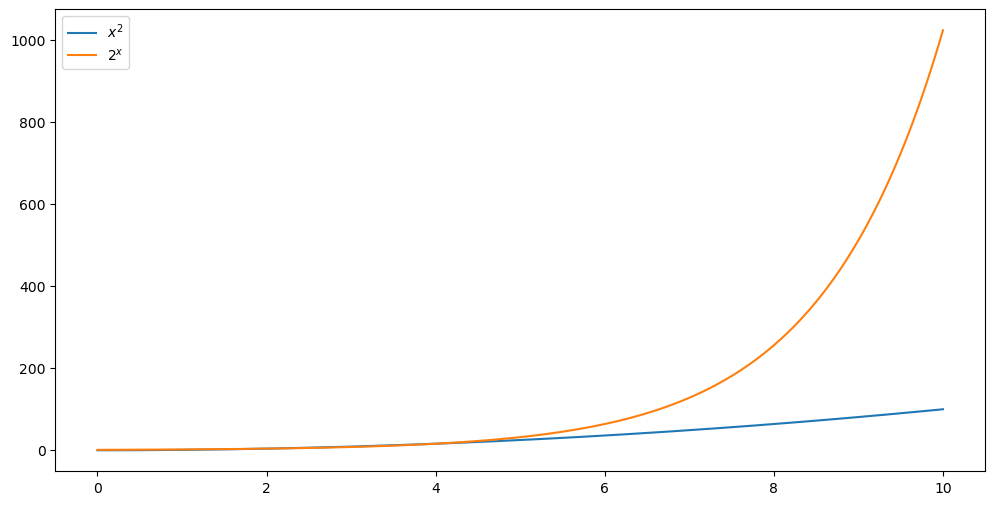

In [5]:
# Numbers.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Create a figure.
fig, ax = plt.subplots(figsize=(12, 6))

# x values.
x = np.linspace(0.0, 10.0, 1000)

# Plot polynomial.
ax.plot(x, x**2, label="$x^2$")

# Plot exponential.
ax.plot(x, 2**x, label="$2^x$")

# Legend.
ax.legend()

# Show.
plt.show();

If you look in the Python code above, you can see the exponential plot is doubling by multiplying itself by two where as the polynominal is being calculated to the power of two which is why the line is much flatter, almost a straight line where as the exponential line has that steep curve. Eventually the line will be going nearly straight up.

<font color=blue><h3>Big O notation in relation to time complexities</h3>

Big O Notation is a way to measure an algorithms efficiency and complexity in relation to the growth of the input size, measured in worst case. It doesn't show the time it takes to complete but rather the number of operations. When doing a comparison of an algrorithm, the lower of the time complexity is an indication of a better perforamce, so then you work out the Big O of an algorithm and use that. For instances where the worst case is the same for both, you then have to start looking at other factors like the best/average case. The time complexity of an algorothim can be put into the following categories. This table is organised in order of increasing complexity and with an example algorithm for each.

|O(1)||Constant time complexity||Example|
|------||-------||-------|
|O(logn)||Logarithmic time complexity || Binary Search
|O(n)||Linear time complexity || Simple search
|O(n2)||Polynomial time complexity || Quicksort
|O(n2n)||Exponential time complexity|| Selection sort
|O(n!)||Factorial time complexity || Travelling salesperson

<font color=blue><h3>The Turing Machine</h3>

The turing machine is was first described by Alan Turing as simple abstract computational devices intended to help investigate the extent and limitations of what can be computed. Turing named this machine around 1936 with the purpose of computing real numbers. The Turing Machine is so important because they are considered to be one of the foundational models of computability and (theoretical) computer science. How the turing machine works is there is a long tape which is divided into cells. Within each cell is either a 1, a 0 or an empty space. Above one cell of the tape is a head, which moves either left or right and reads symbols written into the cells. The direction that a head moves, the value that is erased or the value that is entered depends on the instructions provided to the machine. When you look at this, you can easily compare this to modern machines. Below is an example of what a Turing Machine.

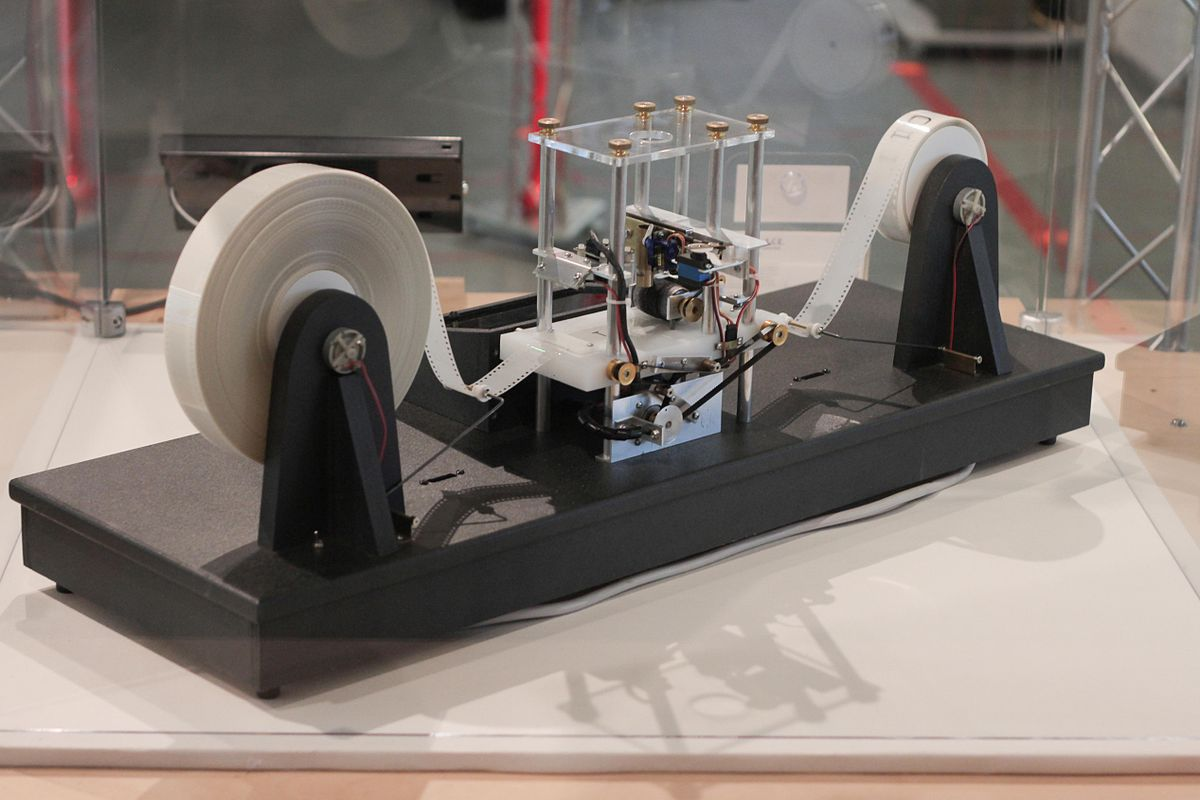

An evolution of the Turing Machine is the Turing-Welchman Bombe machine, electro-mechanical device used to break Enigma-enciphered messages which revealed military operations during World War Two. It was the task of the Bombe to discover the daily key - wheel order, wheel settings and plugboard configuration - to enable the 3-5,000 Enigma messages intercepted each day to be deciphered. It didn't work 100% of the time. It the machine two to four hours to decypher a key and some were just never broken. Despite this, it shortened the war and saved countless lives. Over the course of the war, around 211 Bombe machines were constructed and after the war, 50 machines were kept temporarily.

<font color=blue><h3>Python representaion of the Turing Machine</h3>

In [7]:
# State table.
table = {
    ('X', '_'): ['_', 'R', 'T'],
    ('X', '0'): ['0', 'R', 'X'],
    ('X', '1'): ['1', 'R', 'Y'],
    ('Y', '_'): ['_', 'R', 'F'],
    ('Y', '0'): ['0', 'R', 'Y'],
    ('Y', '1'): ['1', 'R', 'X'],
}

# Tape input.
tape = list('0101111')
# Position on tape.
pos = 0
# Initial state is first in table.
state = 'X'

# Keep going while we are not in a halting state.
while state not in ['T', 'F']:
    # Print the current status.
    print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
    # Get the row of the table.
    row = table[(state, tape[pos])]
    # Overwrite the symbol.
    tape[pos] = row[0]
    # Move left or right.
    if row[1] == 'R':
        # Put blanks on tape as necessary.
        if pos == len(tape) - 1:
            tape = tape + ['_']
        # Increase position.
        pos = pos + 1
    else:
        # Put blanks on tape as necessary.
        if pos == 0:
            tape = ['_'] + tape
            # The position on the tape has to move with it.
            pos = pos + 1
        # Decrease position.
        pos = pos - 1
    # Update the state.
    state = row[2]

# Print the current status.
print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))

X0101111
0X101111
01Y01111
010Y1111
0101X111
01011Y11
010111X1
0101111Y_
0101111_F_


<font color=blue><h3>Classical Circuts</h3>

In the future Quantum Computing will be used in ways that computer scientists can only dream of right now, but for now we are stuck with classic computers and classic ciructs, the computers we have now and their current capabilities. So what is a circut? It is a model of computation in which input values proceed through a sequecnce of gates which results in a function being completed. An example of this is a Boolean Logic gate, in which there are seven states with symbols to denote what state the circut is in. Something worth mentioning is 1 equals true and 0 equals false, like we seen in the Turing machine.
<ul>
    <li>AND - Both outputs have to be either true or false meaning both values have to be 1 for the output to be 1. </li>
    <li>OR - The output is true if either both or one of the outputs are true. The same applies for false.</li>
    <li>XOR (exclusive-OR) - Similar to an OR gate, the output is true if either are but not if inputs are true and the output is false if both inputs are false or if both inputs are true.</li>
    <li>NOT - Uses reverse logic. If the input is 1, then its 0 and vice versa.</li>
    <li>NAND (And followed by a Not) - The output is false if both inputs are true, otherwise the output is true.</li>
    <li>NOR (Inverted or gate) - The output is true if both inputs are false, otherwise the output is false.</li>
    <li>XNOR (exclusive-NOR)  - The output is true only if the inputs are the same and false if the inputs are different.</li>
</ul>

Whats interesting is that when you look at these classic circuts, and having some basic knowledge of programming, we can see how these are applied in a lot of languages. If we take an if statement, the operators '||' is essentially an OR gate or '&&' equates to the AND gate. When you take some of the information we have discussed here and some basic knowledge of computers, you start to see how the Turing machine really is the base of modern computing. 

When can use a label for Boolean Logic gates (M, L, G) where 
<ul>
   <li>M is a set of values</li>
   <li>L is a set of gate values</li>
  <li>G is a direceted acylic graph </li>
</ul>

Here is the symbols of each gate below

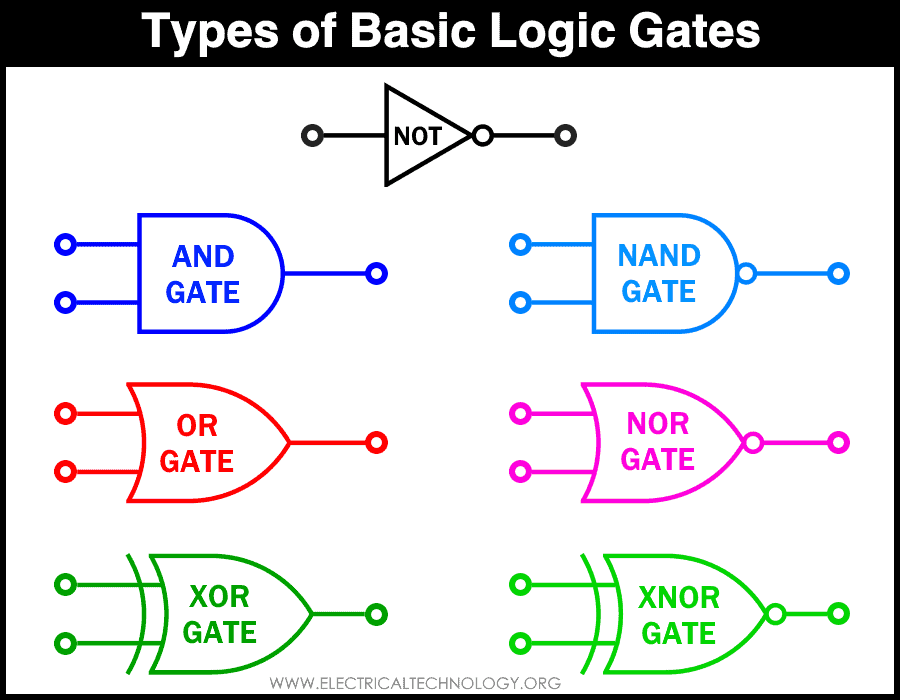

<font color=blue><h3>Putting Boolean Logic gates to use - Combinational Circuts</h3>

Individually, Logic gates are useful but when you combine them, we can create complex machines. These are called Combinational Circuts. Combinational Circuts are logic gates are combined to add functionality and robustness of a program.  The output of the combinational circuit depends on the values at the input at any given time.

<h4>Adder and Half Adder</h4>

The adder is a digital circut, and its main purpose is to add two numeric values. The Adder can computer larger numbers where as The Half Adder can compute single digit numbers. Below are examples of a full and half adder circuts.

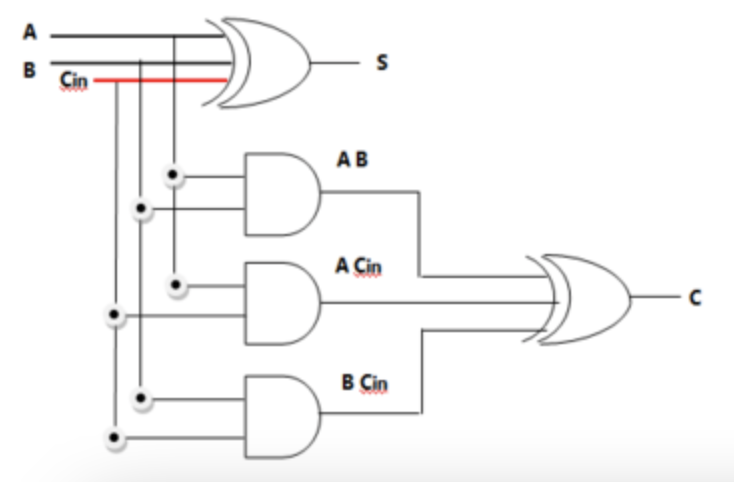

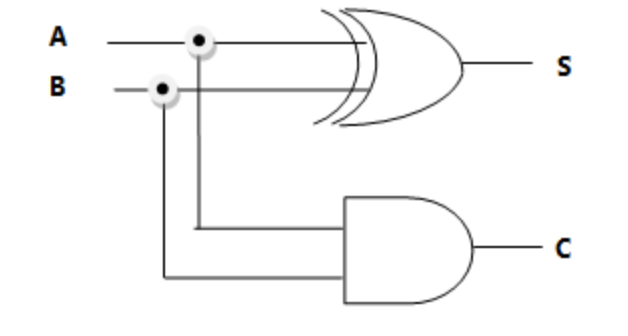

<h4>Full Subtractor and Half Subtractor</h4>

A Full Subtractor generates the output by subtracting two values on three bits and a Half Subtractor will perform is operation on two bits. Below are examples of logic circuts for Full and Half subtractors.

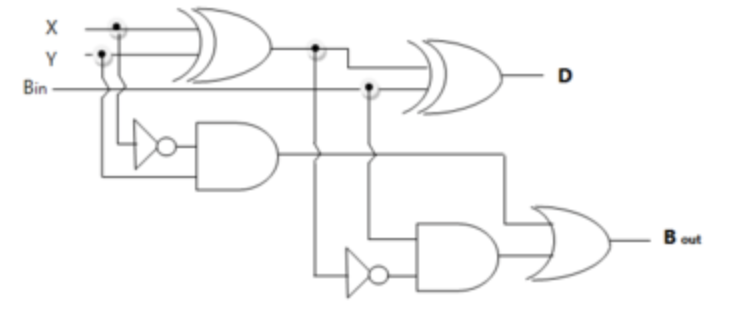

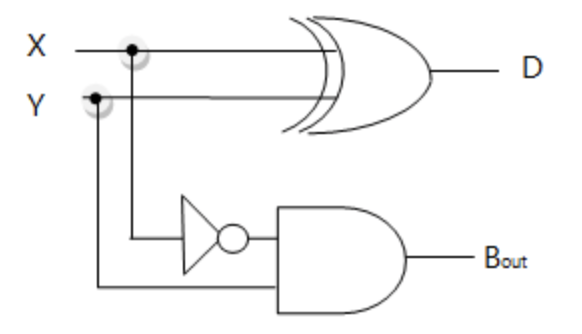

<h4>Multiplexers and De-Multiplexer</h4>

Multiplexers are designed to select one of multiple data inputs and produce a single output where as the De-multiplexer will reverse the operation performed by Multiplexers meaning it will take the single input and produce multiple outputs. The first diagram is a Multiplexer and the second is a De-multiplexer.

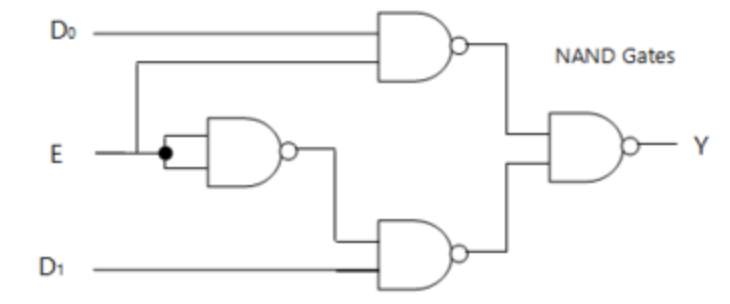

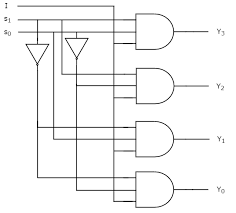

<font color=blue><h3>References Section</h3>

Computational problem - https://en.wikipedia.org/wiki/Computational_problem

Python Matrices and NumPy Arrays - https://www.programiz.com/python-programming/matrix

Why Solving For Efficiency of Matrix Multiplication Such A Big Deal In Computing - https://analyticsindiamag.com/why-solving-for-efficiency-of-matrix-multiplication-such-a-big-deal-in-computing/

Strassen’s Matrix Multiplication - https://www.interviewbit.com/blog/strassens-matrix-multiplication/

Matrix multiplication algorithm - https://www.tutorialspoint.com/matrix-multiplication-algorithm

AI Reveals New Possibilities in Matrix Multiplication - https://www.quantamagazine.org/ai-reveals-new-possibilities-in-matrix-multiplication-20221123/

NVIDIA V100 TENSOR CORE GPU - https://www.nvidia.com/en-us/data-center/v100/

Time complexity - https://en.wikipedia.org/wiki/Time_complexity

Measuring complexity - https://isaaccomputerscience.org/concepts/dsa_cmplx_measuring?examBoard=all&stage=all

Big O notation - https://isaaccomputerscience.org/concepts/dsa_cmplx_big_o?examBoard=all&stage=all

Big O Notation Explained with Examples - https://www.freecodecamp.org/news/big-o-notation-explained-with-examples/

Turing Machines - https://plato.stanford.edu/entries/turing-machine/

The Turing-Welchman Bombe - https://www.tnmoc.org/bombe

Circuit (computer science) - https://en.wikipedia.org/wiki/Circuit_(computer_science)

Basic Combinational Circuits: Types & Examples - https://study.com/academy/lesson/basic-combinational-circuits-types-examples.html

Logic gate (AND, OR, XOR, NOT, NAND, NOR and XNOR) - https://www.techtarget.com/whatis/definition/logic-gate-AND-OR-XOR-NOT-NAND-NOR-and-XNOR